**# Import necessary library**

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

# **Load dataset**

In [101]:
dataset = pd.read_csv("Churn_modelling.csv")

**# Explore Data analysis**

In [47]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
dataset.nunique().sort_values(ascending=False)

RowNumber          10000
CustomerId         10000
EstimatedSalary     9999
Balance             6382
Surname             2932
CreditScore          460
Age                   70
Tenure                11
NumOfProducts          4
Geography              3
Gender                 2
HasCrCard              2
IsActiveMember         2
Exited                 2
dtype: int64

In [35]:
exited_col = dataset["Exited"].value_counts()
exited_col

Exited
0    7963
1    2037
Name: count, dtype: int64

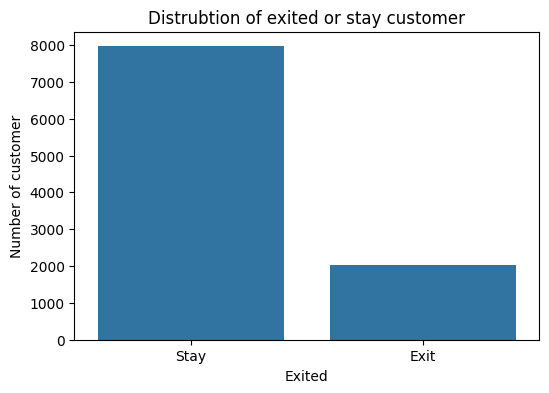

In [10]:
plt.figure(figsize=(6,4))
sns.barplot(x=exited_col.index,y=exited_col.values)
plt.title("Distrubtion of exited or stay customer")
plt.xticks([0,1],["Stay","Exit"])
plt.ylabel("Number of customer")
plt.show()

# **Data Preprocessing**

In [ ]:
#deltet irrelvent columns
dataset.drop(columns=["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [ ]:
#binary encoder on gender
dataset["Gender"] = dataset["Gender"].map({"Male":1,"Female":0})

In [104]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#label encoder on geography
dataset = pd.get_dummies(dataset,dtype=np.int64)

In [106]:
dataset

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


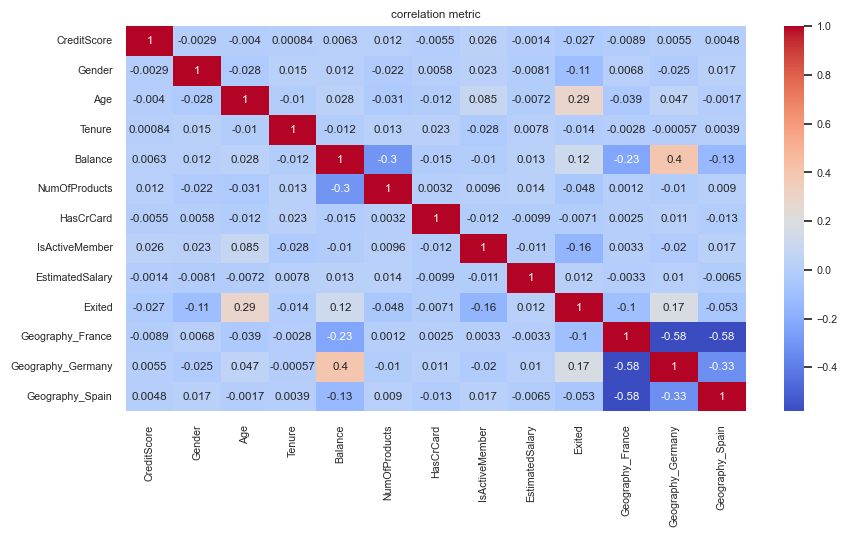

In [ ]:
#check the relevence of feature
corr = dataset.corr()
plt.figure(figsize=(10,5))
sns.set(font_scale=0.7)
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("correlation metric")
plt.show()

In [108]:
corr["Exited"].sort_values(ascending=False)

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Geography_France    -0.104955
Gender              -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64

In [109]:
dataset.drop(columns=["HasCrCard","EstimatedSalary","Tenure","CreditScore"],axis=1,inplace=True)

In [ ]:

x = dataset.drop(columns=["Exited"],axis=1)
y = dataset["Exited"]

In [111]:
x

,Gender,Age,Balance,NumOfProducts,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain
0,0,42,0.00,1,1,1,0,0
1,0,41,83807.86,1,1,0,0,1
2,0,42,159660.80,3,0,1,0,0
3,0,39,0.00,2,0,1,0,0
4,0,43,125510.82,1,1,0,0,1
...,...,...,...,...,...,...,...,...
9995,1,39,0.00,2,0,1,0,0
9996,1,35,57369.61,1,1,1,0,0
9997,0,36,0.00,1,1,1,0,0
9998,1,42,75075.31,2,0,0,1,0


In [ ]:
#handle data imbalance
smote = SMOTE(random_state=42)
x,y = smote.fit_resample(x,y)

In [ ]:
#split dataset into train 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# **Model building and Evaluation**

In [138]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[1333  300]
 [ 360 1193]]

📊 Logistic Regression Report
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1633
           1       0.80      0.77      0.78      1553

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186

ROC-AUC Score: 0.8728
Confusion Matrix:
[[1412  221]
 [ 205 1348]]

📊 Random Forest Report
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1633
           1       0.86      0.87      0.86      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186

ROC-AUC Score: 0.9353
Confusion Matrix:
[[1435  198]
 [ 234 1319]]

📊 Gradient Boosting Report
              precision    recall  f1-score   support

           0       0.86      0

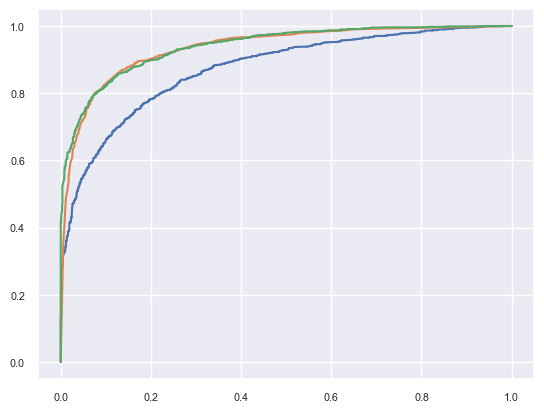

In [139]:
# Train and evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print(f"\n📊 {name} Report")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

C:\Users\User\AppData\Local\Temp\ipykernel_10932\1971977209.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


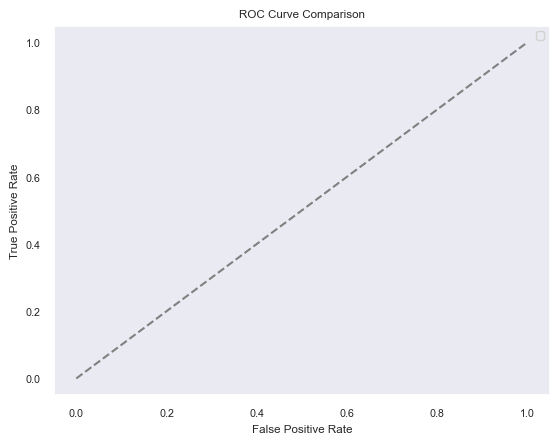

In [132]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()